## Booking EDA 

**Note: please refer to the README.md before runing the code**

In [1]:
# loading the necessary packages  
import pandas as pd 
import numpy as np
import duckdb
import sqlalchemy
import datetime as dt 
import seaborn as sb 
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import ipython-sql Jupyter extension to create SQL cells
%load_ext sql

# to plot on the same cell.
%matplotlib inline

In [2]:
"""
Set configrations on ipython-sql to directly output data to Pandas 
and to simplify the output that is printed to the notebook.

""" 
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# to show all rows/columns 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# saveing data in a database 
%sql duckdb:///booking.duckdb

In [3]:
# loading data as dataframes 

booking = pd.read_csv('Booking4 - Copy.csv')
customer_type = pd.read_csv('CustomerType.csv' , encoding='utf-8-sig')
facility = pd.read_csv('Facility.csv')
payment_type = pd.read_csv('PAYMENT_TYPE_D.csv')
purpose_of_visit = pd.read_csv('Purpose_Of_Visit.csv')
rent_type = pd.read_csv('RentType.csv')
room_type = pd.read_csv('RoomType.csv')
transaction_type = pd.read_csv('TranscationType.csv')

## Exploring , cleaning 

### Exploring Booking table

In [4]:
booking.shape

(1000000, 23)

In [5]:
booking.sample(5)

,Facility_ID,BookingNo,TransactionTypeId,CustomerTypeId,Nationality_Code,CheckInDate,CheckOutDate,CheckInTime,CheckOutTime,TotalDurationDays,RoomRentTypeId,DailyRoomRate,TotalRoomRate,Discount,GrandTotal,Gender,No_Of_Guests,Room_Type_Id,PurposeOfVisit,DateOfBirth,Payment_Type_Id,No_of_Rooms,System_Name
885752,2443,767581,1,3,901,20200220,20200222,0,0,2,1,308.0,616.00,0.0,679.14,0,2,3,7,0,2,1,45
895741,2471,115491,2,1,113,20200723,20200724,31552,230359,1,1,245.0,193.37,0.0,245.00,1,2,2,1,20200723,2,1,12
880246,623,763182,1,1,113,20200921,20200922,0,0,1,1,118.0,118.00,0.0,139.09,1,1,4,1,20200909,1,1,39
85543,3960,81474,1,3,901,20200728,20200730,0,0,2,1,765.0,1530.00,0.0,1686.83,0,2,5,7,0,2,1,45
429902,1340,86283,2,1,113,20201210,20201211,222700,0,1,1,130.0,130.00,0.0,153.00,1,1,5,7,0,1,1,23


In [6]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Facility_ID        1000000 non-null  int64  
 1   BookingNo          1000000 non-null  int64  
 2   TransactionTypeId  1000000 non-null  int64  
 3   CustomerTypeId     1000000 non-null  int64  
 4   Nationality_Code   1000000 non-null  int64  
 5   CheckInDate        1000000 non-null  int64  
 6   CheckOutDate       1000000 non-null  int64  
 7   CheckInTime        1000000 non-null  int64  
 8   CheckOutTime       1000000 non-null  int64  
 9   TotalDurationDays  1000000 non-null  int64  
 10  RoomRentTypeId     1000000 non-null  int64  
 11  DailyRoomRate      1000000 non-null  float64
 12  TotalRoomRate      1000000 non-null  float64
 13  Discount           1000000 non-null  float64
 14  GrandTotal         1000000 non-null  float64
 15  Gender             1000000 non-nu

In [7]:
booking.duplicated().sum()

1

In [8]:
# explore the duplicates 

booking[booking.duplicated()]

,Facility_ID,BookingNo,TransactionTypeId,CustomerTypeId,Nationality_Code,CheckInDate,CheckOutDate,CheckInTime,CheckOutTime,TotalDurationDays,RoomRentTypeId,DailyRoomRate,TotalRoomRate,Discount,GrandTotal,Gender,No_Of_Guests,Room_Type_Id,PurposeOfVisit,DateOfBirth,Payment_Type_Id,No_of_Rooms,System_Name
388731,745,108231,2,1,113,20200901,20201001,130900,0,30,4,235.0,6000.0,0.0,7050.0,1,3,5,4,19800101,3,1,30


In [9]:
# search the booking number to make sure it's duplicated 
booking[booking.BookingNo == 108231]

# indexes (388731 , 114349) are duplicates 

,Facility_ID,BookingNo,TransactionTypeId,CustomerTypeId,Nationality_Code,CheckInDate,CheckOutDate,CheckInTime,CheckOutTime,TotalDurationDays,RoomRentTypeId,DailyRoomRate,TotalRoomRate,Discount,GrandTotal,Gender,No_Of_Guests,Room_Type_Id,PurposeOfVisit,DateOfBirth,Payment_Type_Id,No_of_Rooms,System_Name
114349,745,108231,2,1,113,20200901,20201001,130900,0,30,4,235.000,6000.000,0.0,7050.0,1,3,5,4,19800101,3,1,30
280644,745,108231,2,1,113,20200905,20200930,130900,145700,25,4,200.000,5000.000,0.0,5875.0,1,2,5,4,19800101,1,1,30
388731,745,108231,2,1,113,20200901,20201001,130900,0,30,4,235.000,6000.000,0.0,7050.0,1,3,5,4,19800101,3,1,30
868258,745,108231,3,1,113,20200822,20200823,151103,112300,5,4,85.106,425.531,0.0,500.0,1,1,5,4,0,3,1,30


In [10]:
booking.drop_duplicates(keep = 'first' , inplace = True)

In [11]:
booking.duplicated().sum()

0

In [12]:
booking.columns

Index(['Facility_ID', 'BookingNo', 'TransactionTypeId', 'CustomerTypeId',
       'Nationality_Code', 'CheckInDate', 'CheckOutDate', 'CheckInTime',
       'CheckOutTime', 'TotalDurationDays', 'RoomRentTypeId', 'DailyRoomRate',
       'TotalRoomRate', 'Discount', 'GrandTotal', 'Gender', 'No_Of_Guests',
       'Room_Type_Id', 'PurposeOfVisit', 'DateOfBirth', 'Payment_Type_Id',
       'No_of_Rooms', 'System_Name'],
      dtype='object')

#### Getting the correct format for dates and time

In [13]:
booking[['CheckInDate', 'CheckOutDate', 'CheckInTime',
       'CheckOutTime','DateOfBirth']] = \
booking[['CheckInDate', 'CheckOutDate', 'CheckInTime',
       'CheckOutTime','DateOfBirth']].astype('str')

In [14]:
# get date   %Y%m%d : %H:%M:%S.'

#Checkin
booking['CheckInDate'] = booking['CheckInDate'].\
apply(lambda x:dt.datetime.strptime(x,'%Y%m%d'))
booking.CheckInDate = pd.to_datetime(booking.CheckInDate , format='%Y-%m-%d', errors='coerce')

#Checkout
booking['CheckOutDate'] = booking['CheckOutDate'].\
apply(lambda x:dt.datetime.strptime(x,'%Y%m%d'))
booking.CheckOutDate = pd.to_datetime(booking.CheckOutDate , format='%Y-%m-%d', errors='coerce')

#Date_of_birth
booking['DateOfBirth'] = booking['DateOfBirth'].\
apply(lambda x:dt.datetime.strptime(x,'%Y%m%d')if len(x) == 6\
                                     else x)
booking.DateOfBirth = pd.to_datetime(booking.DateOfBirth , format='%Y-%m-%d', errors='coerce')


# get time 
booking['CheckInTime'] = booking['CheckInTime'].\
apply(lambda x:dt.datetime.strptime(x,'%H%M%S') if len(x) == 6\
                                     else x)
# converting type to date
booking.CheckInTime = pd.to_datetime(booking.CheckInTime , format='%Y-%m-%d', errors='coerce')

# Extracting time only 
booking.CheckInTime = booking.CheckInTime.dt.strftime("%H:%M:%S")

# format the date
booking['CheckOutTime'] = booking['CheckOutTime'].\
apply(lambda x:dt.datetime.strptime(x,'%H%M%S') if len(x) == 6\
                                     else x)
# converting type to date
booking.CheckOutTime = pd.to_datetime(booking.CheckOutTime , format='%Y-%m-%d', errors='coerce')

# Extracting time only 
booking.CheckOutTime = booking.CheckOutTime.dt.strftime("%H:%M:%S")

In [15]:
booking[[
    'CheckInDate' , 
    'CheckOutDate' ,
    'CheckInTime' , 
    'CheckOutTime' ,
    'TotalDurationDays' , 
    'DateOfBirth'
]].sample(5)

,CheckInDate,CheckOutDate,CheckInTime,CheckOutTime,TotalDurationDays,DateOfBirth
757955,2020-06-23,2020-06-24,19:48:48,NaN,1,2020-01-16
446881,2020-09-21,2020-09-22,NaN,NaN,1,NaT
24239,2020-08-01,2020-08-03,16:21:38,15:20:58,2,2020-08-01
464459,2020-10-01,2020-10-02,19:46:11,15:34:02,1,2020-10-01
890541,2020-10-13,2020-10-17,12:23:36,12:59:03,4,NaT


In [16]:
# get age

def get_age(dob):
    today = dt.date.today()
    age = today.year - dob.year - ((today.month , today.day) <(dob.month , dob.day))
    return age 

booking['visitor_age'] = booking.DateOfBirth.apply(get_age)



In [17]:
booking[['DateOfBirth' , 'visitor_age']].sample(1)

,DateOfBirth,visitor_age
255559,NaT,NaN


In [18]:
# get the age in the right format 

def format_age(age):
    a = age.split('.')
    return a[0]
#convert it to str
booking.visitor_age = booking.visitor_age.astype('str')
booking.visitor_age = booking.visitor_age.apply(format_age)

In [19]:
# replace 'nan' with '0' in convert the column to int
booking.visitor_age = booking.visitor_age.replace('nan' , '0')
booking.visitor_age = booking.visitor_age.astype('int')

In [20]:
booking.visitor_age.sample(2)

503896    2
805398    2
Name: visitor_age, dtype: int64

In [21]:
booking.sample(10)

,Facility_ID,BookingNo,TransactionTypeId,CustomerTypeId,Nationality_Code,CheckInDate,CheckOutDate,CheckInTime,CheckOutTime,TotalDurationDays,RoomRentTypeId,DailyRoomRate,TotalRoomRate,Discount,GrandTotal,Gender,No_Of_Guests,Room_Type_Id,PurposeOfVisit,DateOfBirth,Payment_Type_Id,No_of_Rooms,System_Name,visitor_age
886833,3411,412028,1,1,113,2020-10-18,2020-10-19,NaN,NaN,1,1,169.67,169.67,0.0,200.00,0,2,2,1,NaT,1,1,19,0
503190,3254,80558,3,1,113,2019-12-04,2019-12-08,13:35:23,15:25:48,4,1,185.83,743.32,0.0,800.00,1,1,4,7,2019-10-08,1,1,39,2
77730,3887,74205,2,1,113,2020-11-07,2020-11-08,12:29:25,NaN,1,1,124.23,124.23,0.0,150.01,1,1,4,7,2020-04-01,1,1,39,2
356623,3015,325468,3,4,113,2020-07-28,2020-08-07,22:17:00,11:55:00,10,1,324.00,3240.00,0.0,3912.30,0,1,2,4,NaT,2,1,44,0
800104,193,698551,3,1,113,2020-06-06,2020-06-07,20:20:27,12:42:05,1,1,148.66,148.66,0.0,160.00,1,1,4,2,2020-05-27,2,1,39,2
894939,242,774930,3,3,901,2020-09-11,2020-09-12,20:34:00,14:39:00,1,1,364.39,364.39,0.0,401.74,0,2,3,7,NaT,1,1,45,0
139897,3567,131657,3,4,111,2020-09-25,2020-09-26,22:41:07,15:09:09,1,1,250.00,250.00,20.0,230.00,1,1,4,1,2020-08-14,1,1,39,1
730331,3380,641944,3,1,113,2020-12-15,2020-12-16,NaN,13:25:47,1,1,144.22,144.22,0.0,170.00,1,1,4,1,2020-09-15,2,1,39,1
66797,1751,63974,3,1,113,2020-03-04,2020-03-07,20:31:07,16:08:35,3,1,441.35,1324.05,0.0,1425.01,1,1,5,2,1980-11-01,2,1,55,41
588204,22,523987,2,1,113,2020-02-07,2020-02-08,NaN,12:00:00,1,1,90.00,83.62,0.0,90.00,1,1,2,1,NaT,6,1,14,0


### Exploring Facility table 

In [22]:
facility.sample(5)

,Region,city,facility_ID,Facilitylicensingtypearname,Facilityclassificationtypearname,Floorscount,RegularRoomsCount,Regularsuitescount,DeluxeSuitesCount,ParkingsCount
480,0xB74576283864356637DF64230F3987C8,0x3300CBFE6331C95C60370671564AB40F,686,وحدات سكنية مفروشة,درجة ثانية,7,7,4,7,22
2324,0x2B9EF58D376B99838B5C594123836DEB,0x2EA2161686589987BE8DA1CCF9A8EF2E,2692,وحدات سكنية مفروشة,درجة رابعة,3,12,5,4,21
1592,0x9351116F8E9D50190BB897B2EF710D5B,0xA2A253D8746D8204BE0FCC7CB5F3288D,1905,وحدات سكنية مفروشة,درجة ثالثة,4,19,12,6,45
1692,0x94F0C94E071AAA9D670BB26FB7DB0F99,0xE8E1D5BA0E667A040E5784C8445C27EB,2011,وحدات سكنية مفروشة,درجة رابعة,3,24,24,0,40
2525,0x50AF8B3517DD18265275800816D863F9,0x1091D073EE4B0D56A7A65138D83CEEFC,2911,وحدات سكنية مفروشة,درجة رابعة,1,5,7,0,20


In [23]:
# since Region, city have been masked. Im going to exclude them. 

facility = facility.loc[:, ~facility.columns.isin(['Region', 'city'])]

In [24]:
facility.sample()

,facility_ID,Facilitylicensingtypearname,Facilityclassificationtypearname,Floorscount,RegularRoomsCount,Regularsuitescount,DeluxeSuitesCount,ParkingsCount
523,734,فندق,نجمتان,14,228,10,2,38


### Exploring customer type table 

In [25]:
customer_type.shape

(4, 3)

In [26]:
customer_type

,CustomerTypeId,CustomerTypeNameEn,CustomerTypeNameAr
0,1,Citizen,Ù…ÙˆØ§Ø·Ù†
1,2,GolfCitizen,Ù…ÙˆØ§Ø·Ù† Ø®Ù„ÙŠØ¬ÙŠ
2,3,Visitor,Ø²Ø§Ø¦Ø±
3,4,Resident,Ù…Ù‚ÙŠÙ…


### exploring pyment type table 

In [27]:
payment_type.shape

(7, 3)

In [28]:
payment_type

,PAYMENT_TYPE_ID,PAYMENT_TYPE_EN,PAYMENT_TYPE_AR
0,0,Not Applicable / No Payment,غير محدد لايوجد دفع
1,1,Cash,نقد
2,2,Debit or Credit Card,بطاقة اتمانية
3,3,Paid by Company,المدفوعة من قبل الشركة
4,4,Check,شيك
5,5,Other,أخرى
6,6,Online Channel,قناة الكترونيه


### Exploring purpose of visit table 

In [29]:
purpose_of_visit.shape

(10, 3)

In [30]:
purpose_of_visit

,PurposeOfVisit_ID,PurposeOfVisit_En,PurposeOfVisit_Ar
0,1,Tourism,السياحه
1,2,Family or Friends,زيارة الأقارب والاصدقاء
2,3,Religious,زياره دينيه
3,4,Business or Work,عمل
4,5,Sports,نشاط رياضي
5,6,Entertainment,نشاط ترفيهي
6,7,Other,اخرى
7,8,Work (Royal Court),موظف ديوان
8,9,Quarantined guests,"""نزيل حجر """
9,10,Ministry of Health Staff,موظف وزارة الصحة


### Exploring Rent type table 

In [31]:
rent_type.shape

(4, 3)

In [32]:
rent_type

,RentTypeId,RentTypeNameEn,RentTypeNameAr
0,1,Daily,يومي
1,2,Hourly,بالساعة
2,3,Weekly,اسبوعي
3,4,Monthly,شهري


### Exploring room type table 

In [33]:
room_type.shape

(14, 3)

In [34]:
room_type

,RoomType_Id,RoomType_En,RoomType_Ar
0,1,Single Bed Room,غرفة نوم مفردة
1,2,Double Bed Room / Kind Bed Room,غرفة نوم مزدوجة / غرفة نوم كنغ
2,3,Regular Suite,جناح عادي
3,4,"""Studio Apartment / Apartment with Single Room """,شقة استوديو / شقة مع غرفة فردية
4,5,Furnished Apartment with 2 rooms,وحدة سكنيه بغرفتين
5,6,Furnished Apartment with 3 rooms,وحدة سكنيه بثلاث غرف
6,7,Villa,فيلا
7,8,Room with 3 beds,""" غرفه بثلاث اسره"""
8,9,Room with 4 beds,غرفه باربع اسره
9,10,Room with 5 beds,""" غرفه بخمس اسره"""


### Exploring transaction type table

In [35]:
transaction_type.shape

(16, 2)

In [36]:
transaction_type

,TransactionTypeId,TransactionName
0,1,CreateBooking (API External)
1,2,CreateCheckIn (API External)
2,3,CreateCheckOut (API External)
3,4,CancelBooking (API External)
4,5,OccupancyUpdate (API External)
5,6,BookingExpenseDetails (API External)
6,7,Booking Cancel Reasons (Look up)
7,8,Customer Types (Look up)
8,9,Gender (Look up)
9,10,Nationality Codes (Look Up)


# Loading data to database

### Approch:
    1. Load data to database.
    2. Query database for analysis 
    3. load query as a dataframe to preforme analysis with python 

In [37]:
#creating tables out of the dataframes. 

#creating table "booking_F" from booking df 
%sql CREATE TABLE booking_F AS SELECT * FROM booking;

%sql CREATE TABLE facility_D AS SELECT * FROM facility; 

%sql CREATE TABLE pyment_type_D AS SELECT * FROM payment_type;

%sql CREATE TABLE purpose_of_visit_D AS SELECT * FROM purpose_of_visit; 

%sql CREATE TABLE customer_type_D AS SELECT * FROM customer_type;

%sql CREATE TABLE rent_type_D AS SELECT * FROM rent_type; 

%sql CREATE TABLE room_type_D AS SELECT * FROM room_type; 

# for transaction df ->  we don't need it for analysis 




/home/abdullah/self/career/assessments/tm_as/tm_env/lib/python3.10/site-packages/sql/run.py:367: SAWarning: Dialect postgresql:psycopg2 will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  result = conn.session.execute(txt, user_namespace)


,Count
0,14


In [38]:
# show the tables in the database 


%sql show tables;

,name
0,booking_F
1,customer_type_D
2,facility_D
3,purpose_of_visit_D
4,pyment_type_D
5,rent_type_D
6,room_type_D


In [39]:
# data cataloge/metadata 

%sql describe; 

,table_name,column_names,column_types,temporary
0,booking_F,"[BookingNo, CheckInDate, CheckInTime, CheckOut...","[BIGINT, TIMESTAMP, VARCHAR, TIMESTAMP, VARCHA...",False
1,customer_type_D,"[CustomerTypeId, CustomerTypeNameAr, CustomerT...","[BIGINT, VARCHAR, VARCHAR]",False
2,facility_D,"[DeluxeSuitesCount, Facilityclassificationtype...","[BIGINT, VARCHAR, VARCHAR, BIGINT, BIGINT, BIG...",False
3,purpose_of_visit_D,"[PurposeOfVisit_Ar, PurposeOfVisit_En, Purpose...","[VARCHAR, VARCHAR, BIGINT]",False
4,pyment_type_D,"[PAYMENT_TYPE_AR, PAYMENT_TYPE_EN, PAYMENT_TYP...","[VARCHAR, VARCHAR, BIGINT]",False
5,rent_type_D,"[RentTypeId, RentTypeNameAr, RentTypeNameEn]","[BIGINT, VARCHAR, VARCHAR]",False
6,room_type_D,"[RoomType_Ar, RoomType_En, RoomType_Id]","[VARCHAR, VARCHAR, BIGINT]",False


In [40]:
booking.columns

Index(['Facility_ID', 'BookingNo', 'TransactionTypeId', 'CustomerTypeId',
       'Nationality_Code', 'CheckInDate', 'CheckOutDate', 'CheckInTime',
       'CheckOutTime', 'TotalDurationDays', 'RoomRentTypeId', 'DailyRoomRate',
       'TotalRoomRate', 'Discount', 'GrandTotal', 'Gender', 'No_Of_Guests',
       'Room_Type_Id', 'PurposeOfVisit', 'DateOfBirth', 'Payment_Type_Id',
       'No_of_Rooms', 'System_Name', 'visitor_age'],
      dtype='object')

### Data Quality Issues. 

In [41]:
%%sql 

data_qulity_first 

<< 

SELECT 
    b.CheckInDate , 
    b.Checkoutdate , 
    b.TotalDurationDays, 
    date_diff('day' , b.checkindate , b.checkoutdate) actual_date_diff

FROM 
    booking_F b 
WHERE 
    b.TotalDurationDays <> date_diff('day' , b.checkindate , b.checkoutdate)
AND 
    date_diff('day' , b.checkindate , b.checkoutdate) <> 0
ORDER BY 
    b.TotalDurationDays DESC;

Returning data to local variable data_qulity_first


In [42]:
data_qulity_first.head(15)

,CheckInDate,CheckOutDate,TotalDurationDays,actual_date_diff
0,2019-12-31,2020-01-01,8870,1
1,2019-12-31,2020-01-01,8870,1
2,2019-12-31,2020-01-01,8870,1
3,2014-02-05,2024-05-02,1549,3739
4,2020-08-24,2023-03-02,900,920
5,2019-12-23,2022-06-11,900,901
6,2020-04-03,2023-01-17,900,1019
7,2020-02-01,2022-08-17,900,928
8,2019-12-14,2022-06-11,900,910
9,2020-01-02,2022-06-22,900,902


#### Data quality 1 observation:
**ISSUE:**
- there are gaps and inconsistency about TotalDurationDays and the actual diffreances between checkin/checkout dates.

**SOLUTION:**
- We don't want to make assumptions about the data, it's a good idea to contact the data owners and address this issue.  

### Data quality issue 2

In [43]:
%%sql 

SELECT   
    date_part('year', b.checkindate) AS year ,  
    count(*) AS number_of_bookings  , 
    CAST(CAST(SUM(b.grandtotal) AS bigint) AS varchar) total_paid_per_year
FROM  
    booking_F b 
GROUP BY 
    date_part('year' , b.checkindate) 
ORDER BY 
    date_part('year' , b.checkindate) 
        

,year,number_of_bookings,total_paid_per_year
0,NaN,9,51651
1,1994.0,1,1223300
2,2001.0,1,1019250
3,2007.0,227,569713
4,2008.0,68,199739
5,2009.0,4,15653
6,2010.0,6,18141
7,2011.0,12,42666
8,2012.0,25,52201
9,2013.0,203,344491


#### Data quality 2 observations: 

**ISSUE:** 
- The years data distribution might be incorrect becuase 99% of the data lay on the year 2020. 
- paid per year and number of booking raises some flags too. 

**SOLUTION:** 
- consider only the year 2020 for analysis. unitl we can quality assure the other years data.


# Analysis 

## 1. Spendings distribution across the ages. 
**the what:**
- I want to know how the spending distributed across the vistors age.

**The why:**
- I want to understand which age groups are more likely to travel. 

**So What:** 
- We can I understand that group habits and take actions

### Spendings distribution across the ages. 

In [44]:
%%sql 

SELECT 
    b.visitor_age ,
    count(*)  vistors_count, 
    avg(b.GrandTotal)  average_spending_per_age, 
        
FROM 
    booking_F b 
WHERE 
    b.visitor_age is not null 
AND 
    b.visitor_age between 15 and 90
GROUP BY 
    b.visitor_age 
ORDER BY 
    avg(b.GrandTotal) desc;


,visitor_age,vistors_count,average_spending_per_age
0,21,8351,1726.201850
1,22,16210,1410.134475
2,72,509,1346.402986
3,78,77,1317.042208
4,74,233,1270.508841
5,77,118,1244.503602
6,52,5462,1215.203872
7,69,385,1171.942109
8,62,1698,1146.591855
9,65,939,1127.950351


### Saving the query as a df. 

In [45]:
%%sql 

spending_per_age 
<< 
SELECT 
    b.visitor_age ,
    count(*)  vistors_count, 
    avg(b.GrandTotal)  average_spending_per_age, 
        
FROM 
    booking_F b
WHERE 
    b.visitor_age is not null 
AND 
    b.visitor_age between 15 and 90
GROUP BY 
    b.visitor_age 
ORDER BY 
    avg(b.GrandTotal) desc;


Returning data to local variable spending_per_age


In [46]:
spending_per_age.shape

(76, 3)

In [47]:
spending_per_age.sample()

,visitor_age,vistors_count,average_spending_per_age
35,51,5414,811.011492


Text(0.5, 1.0, 'Spendings distribution across the ages')

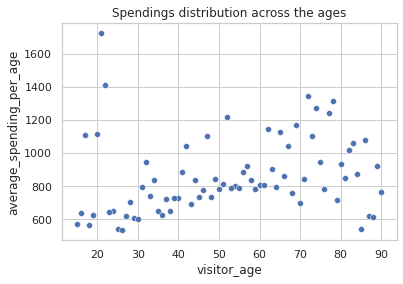

In [48]:
# visulizing 

sb.set(style="whitegrid") 

ax = sb.scatterplot(x='visitor_age' ,y='average_spending_per_age' , 
                     data = spending_per_age)

plt.title('Spendings distribution across the ages')

Text(0.5, 1.0, 'Spendings distribution across the ages')

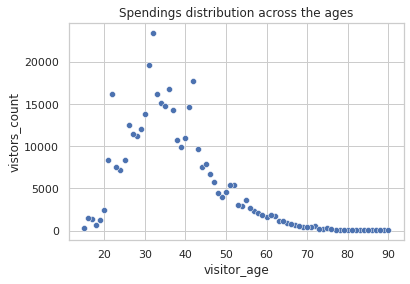

In [49]:
# visulizing 

sb.set(style="whitegrid") 

ax = sb.scatterplot(x='visitor_age' ,y='vistors_count' , 
                     data = spending_per_age)

plt.title('Spendings distribution across the ages')

### Observation

1. According to the data, the older you are; the more you are willing to pay per night. 
2. Vistor who are between(30-40) years old; tend to travel a lot. 

##  2. Customer type  booking distribution

**The what:** 
- I want to see which customer group travels a lot. 
- Im more intrested in the people which they travel for pleasure 
    (turism, religious , entertainment , sport) 
- I want to know how much many each group paid. 

**The why:** 
- Understanding where most of the tourists coming from 
- Understand how much many generated for the economy. 

**So What:** 
- By understanding the above we can provide, benifits/advertisments for that perticulary group/country. 


In [50]:
%%sql 

booking_by_customer_type 
<< 
SELECT 
    ct.CustomerTypeNameEn,
    count(*) as count
FROM 
    booking_F b 
INNER JOIN 
    customer_type_D ct on (ct.CustomerTypeId = b.CustomerTypeId)
INNER JOIN 
    purpose_of_visit_D p on (p.PurposeOfVisit_ID = b.PurposeOfVisit)
WHERE 
    p.PurposeOfVisit_En in('Tourism' , 
                             'Entertainment' , 
                             'Sports' , 
                             'Religious')
                             
GROUP BY
    ct.CustomerTypeNameEn
ORDER BY 
    count DESC; 

Returning data to local variable booking_by_customer_type


In [51]:
booking_by_customer_type

,CustomerTypeNameEn,count
0,Citizen,238941
1,Resident,29446
2,Visitor,23818
3,GolfCitizen,3431


Text(0.5, 1.0, 'Customer type booking distribution')

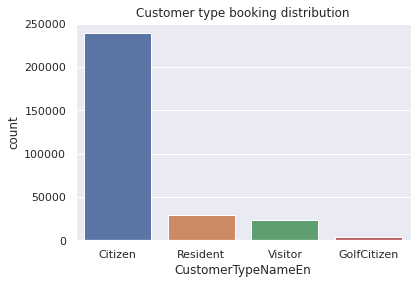

In [52]:
# visulizing 

sb.set(style="darkgrid") 

ax = sb.barplot(x='CustomerTypeNameEn' ,
                    y='count' , 
                     data = booking_by_customer_type)

plt.title('Customer type booking distribution')

### Observation:

- The majority of tourist are citizens 
- Sincce the majoirty of the data coming from 2020, and we understand there were some restrictions on traveling due to COVID. that might explains why the other groups number are low. 

### Exploring how much many each group generate

In [53]:
%%sql 

total_spending_per_group 
<<
SELECT 
    ct.CustomerTypeNameEn, 
    SUM(b.grandtotal) total_paid_per_group
FROM 
    booking_F b 
INNER JOIN
    customer_type_D ct on (ct.CustomerTypeId = b.CustomerTypeId)
INNER JOIN
    purpose_of_visit_D p on (p.PurposeOfVisit_ID = b.PurposeOfVisit)
WHERE 
    p.PurposeOfVisit_En in('Tourism' , 
                             'Entertainment' , 
                             'Sports' , 
                             'Religious')
                             
GROUP BY 
    ct.CustomerTypeNameEn
ORDER BY 
    total_paid_per_group DESC;

Returning data to local variable total_spending_per_group


In [54]:
total_spending_per_group

,CustomerTypeNameEn,total_paid_per_group
0,Citizen,1.473414e+08
1,Visitor,2.715543e+07
2,Resident,1.509519e+07
3,GolfCitizen,2.720009e+06


Text(0.5, 1.0, 'Total spending per group')

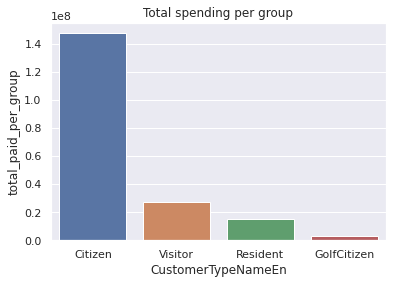

In [55]:

# convert total paid to int
total_spending_per_group['total_paid_per_group'] = \
total_spending_per_group['total_paid_per_group'].astype('int')

# visulizing 

sb.set(style="darkgrid") 

ax = sb.barplot(x='CustomerTypeNameEn' ,
                    y='total_paid_per_group' , 
                     data = total_spending_per_group)

plt.title('Total spending per group')

### Observations
- Citizens has generated ~147,000,000 from tourism 
- Although visitor came third in number of tourist, but the the highest group to generate money from tourism with ~ 27,000,000 
- Residents generate ~ 15,000,000 
- Gulf Citizens generate ~ 2,500,000

### Getting the average payment per group 

In [56]:
%%sql 

avg_per_group
<< 

SELECT 
    ct.CustomerTypeNameEn, 
    avg(b.grandtotal) total_paid_per_group
FROM 
    booking_F b 
INNER JOIN
    customer_type_D ct on (ct.CustomerTypeId = b.CustomerTypeId)
INNER JOIN
    purpose_of_visit_D p on (p.PurposeOfVisit_ID = b.PurposeOfVisit)
WHERE 
    p.PurposeOfVisit_En in('Tourism' , 
                             'Entertainment' , 
                             'Sports' , 
                             'Religious')
                             
GROUP BY 
    ct.CustomerTypeNameEn
ORDER BY 
    total_paid_per_group DESC;

Returning data to local variable avg_per_group


In [57]:
avg_per_group

,CustomerTypeNameEn,total_paid_per_group
0,Visitor,1140.122296
1,GolfCitizen,792.774491
2,Citizen,616.643572
3,Resident,512.639821


Text(0.5, 1.0, 'Average payment per group')

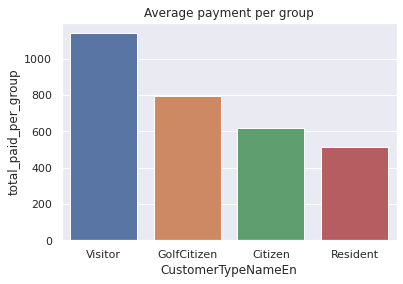

In [58]:

# visulizing 

sb.set(style="darkgrid") 

ax = sb.barplot(x='CustomerTypeNameEn' ,
                    y='total_paid_per_group' , 
                     data = avg_per_group)

plt.title('Average payment per group')

### Observations:
- On average visitors group spent more money with ~ 1,100 per booking.
- Golf Citizens group in second place, with ~800 per booking.
- Citizens spent  ~ 600 per booking on average
- Resident spent  ~ 500 per booking on average 

# To sum up

- **In the project:**
    - Two quility issues
    - Two analysis topics 
- **Things can advance the project:**
    - Explroing the correlation between booking/facilities 
    - Addressing the quality issues 
    - Apply predections methods when suitable
    - Provide actions/recommendations to management. 